### Tutorial


* [A primer on deep learning in genomics](https://www.nature.com/articles/s41588-018-0295-5)
* [Accompanying Colab](https://colab.research.google.com/github/TankMermaid/1000-genomes-genetic-maps/blob/master/A_Primer_on_Deep_Learning_in_Genomics_Public.ipynb#scrollTo=eiiwjw4yhX0P)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import requests

In [5]:
SEQUENCES_URL = 'https://raw.githubusercontent.com/abidlabs/deep-learning-genomics-primer/master/sequences.txt'
###
sequences = pd.read_csv(SEQUENCES_URL,header=None)
sequences.columns = ['Sequences']
####
sequences = sequences['Sequences']
len(sequences)

2000

In [19]:
#sequences = sequences[:50]

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [7]:
# The LabelEncoder encodes a sequence of bases as a sequence of integers.
integer_encoder = LabelEncoder()  
# The OneHotEncoder converts an array of integers to a sparse matrix where 
# each row corresponds to one possible value of each feature.
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

for sequence in sequences:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 CCGAGGGCTA ... CGCGGACACC
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
labels = pd.read_csv('https://raw.githubusercontent.com/abidlabs/deep-learning-genomics-primer/master/labels.txt',header=None)
labels = list(labels.iloc[:,0])
#labels = list(filter(None, labels))  # removes empty sequences

In [9]:
#labels = labels[0:50]

In [10]:
one_hot_encoder = OneHotEncoder(categories='auto')
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)

Labels:
 [[0 0 0 ... 0 1 1]]
One-hot encoded labels:
 [[1. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]]


In [11]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    input_features, input_labels, test_size=0.25, random_state=42)

In [ ]:
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=12, 
                 input_shape=(train_features.shape[1], 4)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['binary_accuracy'])
model.summary()

2021-10-30 14:07:59.386522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-30 14:08:00.044239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


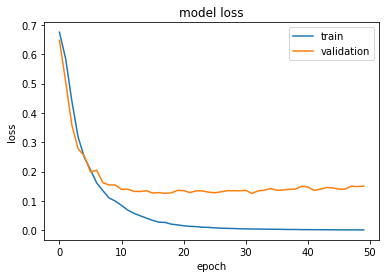

In [147]:
history = model.fit(train_features, train_labels, 
                    epochs=50, verbose=0, validation_split=0.25)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

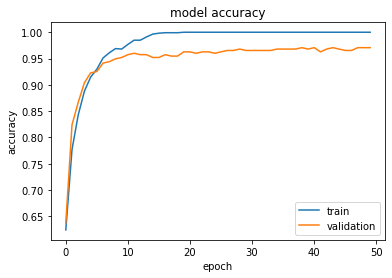

In [149]:
plt.figure()
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

Confusion matrix:
 [[248  11]
 [  3 238]]


2021-10-30 14:08:27.538449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


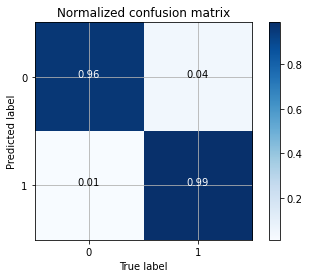

In [150]:
from sklearn.metrics import confusion_matrix
import itertools

predicted_labels = model.predict(np.stack(test_features))
cm = confusion_matrix(np.argmax(test_labels, axis=1), 
                      np.argmax(predicted_labels, axis=1))
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xticks([0, 1]); plt.yticks([0, 1])
plt.grid('off')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment='center',
             color='white' if cm[i, j] > 0.5 else 'black')

In [98]:
x= sequences[1999]
x

'AATGTCGACCGAACTCCGCACTGCTGGCCCGGGCCTATATCGAGAGTGAC'

In [118]:
from tensorflow import keras

In [124]:
from vis.losses import ActivationMaximization
from vis.regularizers import TotalVariation, LPNorm
from vis.input_modifiers import Jitter
from vis.optimizer import Optimizer
from vis.callbacks import GifGenerator

In [126]:
from vis.losses import ActivationMaximization
from vis.regularizers import TotalVariation, LPNorm

filter_indices = [1, 2, 3]

# Tuple consists of (loss_function, weight)
# Add regularizers as needed.


NameError: name 'keras_layer' is not defined

In [142]:
#from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations

In [151]:
layer_idx = utils.find_layer_idx(model, 'dense_12')

In [152]:
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

In [161]:
import matplotlib.pyplot as plt
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations
#import scipy.ndimage as ndimage

ImportError: cannot import name 'imresize' from 'scipy.misc' (/Users/leonjdaeim/opt/miniconda3/envs/mlp/lib/python3.8/site-packages/scipy/misc/__init__.py)

In [155]:
# This is the output node we want to maximize.
filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)

NameError: name 'visualize_activation' is not defined